# Using VICTOR to solve volcano science problems
This notebook is intended to:

1. Provide an overview of cumulative distributions and cumuative density functions and their application in volcanic hazard assessment

2. Introduce summation in the context of python and loops

3. Provide background and overview of a nonparametric statistical text, the Kolmogorov - Smirnov test, a widely used method to compare data and model output.

4. Build coding foundations, including alternative methods of data visualization (plotting) using matplotlib.

## Notebook V2b: Kolmogorov - Smirnov test to compare observations and models

#### version 0, Nov 11, 2022

### Background

The Kolmogorov - Smirnov (K-S) test is used to compare data and models, or even data with other data. Are the model and data the same or are they different? The null hypothesis is that the model and the observations are essentially the same - more formally, the two sets are drawn from the same distibution.  The alternative hypothesis is that the two sets are different (drawn from two diferent distributions. The K-S test is used to evaluate the hypothesis and its alternative.

The K-S test is non-parametric, in the sense that no parameters need to be estimated from the data, like the mean or the standard deviation, in order to do the comparison. This is a great advantage of the K-S test, because you can compare all sorts of distributions without making assumptions about the distributions. In contrast, for example, a $t$ test assumes the distributions are normal.

The K-S test bases the comparison on the cumulative distribution functions for data and the model cumulative distribution function. The test finds the maximum difference between the model and observed cumulative distribution functions, and compares this to the maximum differnce expected, say with 95 percent confidence, if the cumulative distribution functions are the same.

The steps in applying the K-S test are:

1. Gather observed data
2. Plot the data as a cumulative distribution function. This is called an empirical cumulative distribution function because it depends on data (empirical observations).
3. Devise a model distribution to test your empirical distribution against
4. Find the cumulative model distribution
5. Find the maximum difference between the two distributions
6. Assess the significance of the maximum difference to determine if the null hypothesis is accepted or rejected.


### Basalt column example
Basalt columns form diring the cooling of some basalt lava flows. Supposedly, basalt columns are hexagonal - that is, they have 6 sides. The six-sided configuration is the ideal configuration of cracks, if cooling of the surface is uniform. Basically, if crack nucleation sites are random, and fractures extend out from nucleation sites, they will create a six-sided network.

But does this perfect hexagonal geometry actually exist in nature? Use the K-S test to find out.

$$ H_o: \textrm{basalt columns have six sides}$$
$$ H_1: \textrm{basalt columns do not all have six sides} $$

We accept some slop. That is, even if basalt columns have six sides, we accept that some might have 5 or 7. Too much deviation from six sides will cause us to reject the null hypothesis ($H_o$). 

Step 1 is to gather data. In this case, a number of basalt columns are observed and their sides counted. This data set comes from a basalt lava flow in Scotland. it is a good idea to make a histogram (bar plot) of the data.

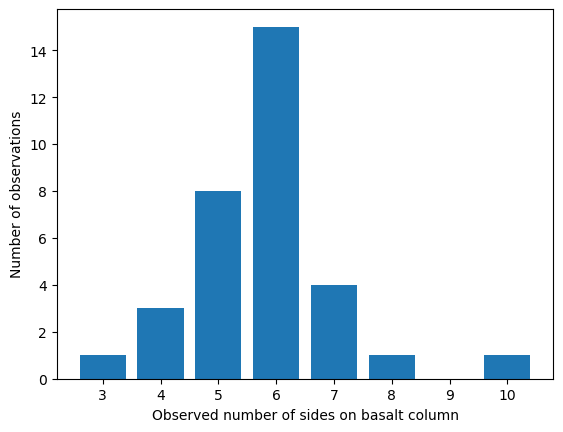

In [1]:
#use matplotlib to create a bar plot of the basalt column data
import matplotlib.pyplot as plt

#basalt column data are described in 2 lists.
# the first list contains the number of side categories. Basalt columns are observed
# with 3 to 10 sides
number_sides = [3,4,5,6,7,8,9,10]

# The second list is the number of obs basalt columns with given number of sides
obs_number_sides = [1,3,8,15,4,1,0,1]

# make a bar plot    
plt.bar(number_sides, obs_number_sides)
plt.xlabel ("Observed number of sides on basalt column")
plt.ylabel ("Number of observations")
plt.show()

The bar plot of the data indicates most basalt columns have six sides (the mode of the distribution is 6), but there is plenty of variation in the number of sides observed.

Step 2 is to calculate the empirical cumulative distibution function, the "ecdf" for the basalt column data. The ecdf keeps a running total of the number of observations less than or equal to a category or value, in this case the number of sides on the basalt column. 

In this example, there is an ordered set of observations: 1 observation of a three-sided column, 3 observations of a four-sided column, 8 observations of a five-sided column, etc. So the observed cumulative total is 1 observation of a three-sided column, 4 observations of four-sided columns or fewer sides, 12 observations of five sided columns or few sides, etc. We keep a running total.

This procedure to find the ecdf is implemented in code in a loop, using summation:

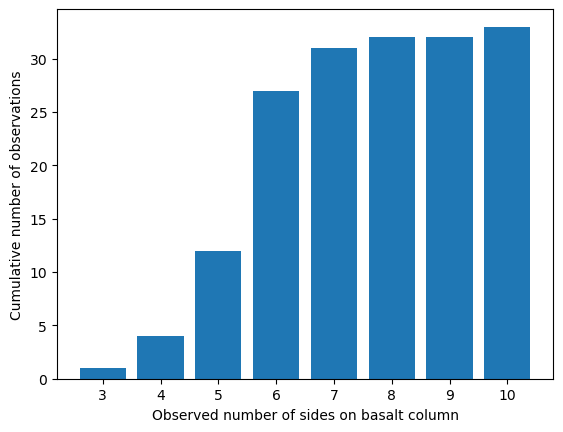

In [2]:
import matplotlib.pyplot as plt

# the data are the same as before
number_sides = [3,4,5,6,7,8,9,10]
obs_number_sides = [1,3,8,15,4,1,0,1]

#make a list that will contain the ecdf for the data
ecdf = []

# initialize the running total
running_total = 0

# create a loop to calculate the ecdf
# i is an index variable, the loop runs through all possible sides
for i in range (len(number_sides)):
    
    # the += sign indicates summation
    running_total += obs_number_sides[i]
    
    #the current sum is added to the ecdf list
    ecdf.append(running_total)
    
# make a bar plot    
plt.bar(number_sides, ecdf)
plt.xlabel ("Observed number of sides on basalt column")
plt.ylabel ("Cumulative number of observations")
plt.show()

The ecdf has exactly the same information about the data as shown in the original bar plot, but the data are cumulative - the bars increase in length monotonically from left to right.

The following is a code that shows the same ecdf but using a step graph instead of bars:

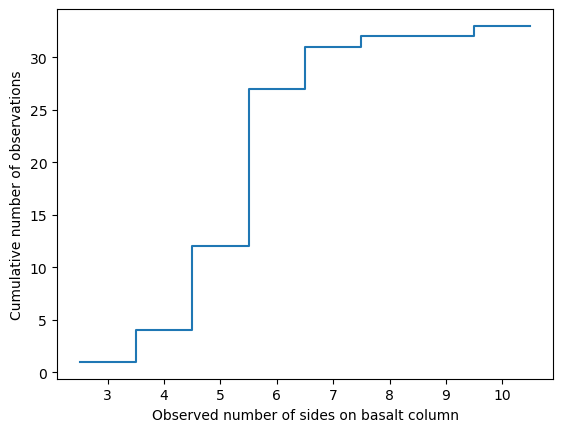

In [3]:
#makes more sense to plot this as a step function
import matplotlib.pyplot as plt
#basalt column data
#how many sides are on a basalt column?
number_sides = [3,4,5,6,7,8,9,10]
obs_number_sides = [1,3,8,15,4,1,0,1]

#make a list of the cumulative frequency
ecdf = []
step =[]
step_ecdf = []
running_total = 0
for i in range (len(number_sides)):
    step.append(number_sides[i] - 0.5)
    step.append(number_sides[i] + 0.5)
    
    running_total += obs_number_sides[i]
    ecdf.append(running_total)
    step_ecdf.append(running_total)
    step_ecdf.append(running_total)
    
plt.plot(step, step_ecdf)
plt.xlabel("Observed number of sides on basalt column")
plt.ylabel("Cumulative number of observations")
plt.show()

Step three is to devise a model for the data. In this case the model is simple: all basalt columns have six sides. Step 4 is to create a cumulative distribution function for the model (a model cdf) and compare the curves. 

Also, in the following code the cumulative distribution is normalized to 1. That is there is a 100 percent chance that the basalt columns have 10 sides or fewer.

/tmp/ipykernel_380/770003754.py:27: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-k" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(step, step_model_cdf, "-k", linestyle = "dashed")


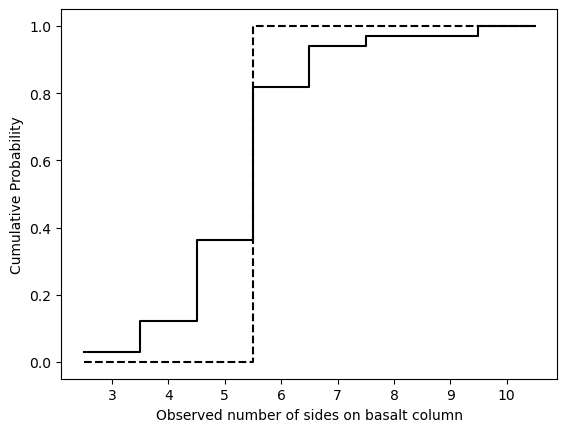

In [5]:
#now develop a model of the basalt columns
#our first model is that basalt columns always have 6 sides

total_sides = sum(obs_number_sides)
model_freq_sides = [0,0,0, total_sides,0,0,0,0]

running_total = 0
step_normal_ecdf = []
normal_ecdf = []
model_running_total = 0
model_cdf = []
step_model_cdf = []

for i in range (len(number_sides)):
    running_total += obs_number_sides[i]/total_sides
    normal_ecdf.append(running_total)
    
    step_normal_ecdf.append(running_total)
    step_normal_ecdf.append(running_total)
    
    model_running_total += model_freq_sides[i]/total_sides
    model_cdf.append(model_running_total)
    step_model_cdf.append(model_running_total)
    step_model_cdf.append(model_running_total)
    
plt.plot(step, step_normal_ecdf, "-k")
plt.plot(step, step_model_cdf, "-k", linestyle = "dashed")
plt.xlabel("Observed number of sides on basalt column")
plt.ylabel("Cumulative Probability")
plt.show()

The ecdf is plotted as a solid black line, the model cdf is plotted as a dashed black line. Are the curves close enough to accept the null hypothesis (all columns ar esix-sided)? Step 5 is to find the maximum difference in the distributions. Step 6 is to find the confidence level and evaluate the hypothesis.

In [6]:
import math

diff = []
for i in range (len(number_sides)):
    diff.append(normal_ecdf[i]-model_cdf[i])

max_diff = abs(max(diff))
print ("max difference = ", max_diff)

degrees_of_freedom = total_sides
print ("degrees of freedom = ", degrees_of_freedom)

# since the data and model are normalized to 1
# the 95% confidence level is given by this equation
confidence_level = 1.36/math.sqrt(degrees_of_freedom)
print("at 95% confidence" , confidence_level)

max difference =  0.36363636363636365
degrees of freedom =  33
at 95% confidence 0.2367456120997491


Since the confidence level calculated at 95 percent for the maximum difference is less than the absolute value of the percentage difference between the observations and model (the max difference), we reject the null hypothesis. There are too many basalt columns that are not six-sided to say that basalt columns are six-sided with 95% confidence. Cooling conditions that led to the formation of columns were not uniform.

## More Applications
Granulometry is used to describe pyroclastic deposits. A volcano scientist gathers granulometry data for a tephra deposit section by seiving 1 kg (1000 gm) of tephra at 0.5 $\phi$ intervals. The scientist then uses a tephra dispersion model (Tephra2) to model the expected grainsize distribution at that location, using a set of eruption source parameters. Does the model output match the observations? Use the K-S test to find out.

In [ ]:
# the grainsize classes, based on seive size
phi_class = [-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

# the observed mass in each class (gm)
obs_mass = [0.0, 0.0, 0.18, 0.8, 4.3, 11.32, 37.7, 90.3, 263.3, 403.0, 98.6, 17.4, 14.4, 15.0, 16.7, 17.9, 9.1]

# The modeled mass in each class (output from a computer model of the eruption)
model_mass = [9.9e-04, 0.0143, 0.1357, 0.8923, 4.250, 15.231, 39.6548, 98.218, 257.3983, 413.2291, 103.6571, 23.15803, 18.4884, 12.4401, 5.7944, 4.2621, 3.1753]


Consider eruptions of Merapi volcano (Indonesia). The number of eruptions is tallied at one decade intervals starting in 1871 to the most recent full decade, 2011-2020, using data from the GVN catalog. Only confirmed eruptions from the GVN catalog are included. Is eruptive activity at Merapi steady-state? Hint: if the activity is steady-state, on a decade scale, we expect the same number of eruptions in each decade. Check it out with the K-S test. What do these results mean, in your opinion, for the potential number of Merapi eruptions in the decade 2021 - 2030?


In [ ]:
decade_start_date = [1871, 1881, 1891, 1901, 1911, 1921, 1931, 1941, 1951, 1961, 1971, 1981, 1991, 2001, 2011]
number_eruptions_per_decade = [3, 4, 5, 6, 3, 3, 3, 2, 1, 2, 1, 1, 1, 2, 5]
